**Markov Chain as a Text Generator**

In the context of text generation, a *Markov Chain* can be used to generate text by modeling words as states and defining the probability of one word following another based on the training corpus. The idea is to learn the probability of transitioning from one word to another, and then use this to generate new text based on the learned probabilities.

For example, from the corpus:

**I love programming in Python**

You can build a transition matrix for the words, such as:

From "I" to "love" = 1.0 (100% chance)

From "love" to "programming" = 1.0

From "programming" to "in" = 1.0

From "in" to "Python" = 1.0

In [1]:
import numpy as np
import random
import re
from collections import defaultdict

In [2]:
text = """
Markov Chains are fascinating. They allow us to generate sequences that resemble the training data. 
With enough data, these chains can produce realistic sentences. However, their simplicity has limitations.
"""

In [3]:
def preprocess_text(text):
    """
    Cleans and tokenizes input text.
    - Removes special characters
    - Converts text to lowercase
    - Splits into words
    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    return words

tokens = preprocess_text(text)
print("Tokens:", tokens)

Tokens: ['markov', 'chains', 'are', 'fascinating', 'they', 'allow', 'us', 'to', 'generate', 'sequences', 'that', 'resemble', 'the', 'training', 'data', 'with', 'enough', 'data', 'these', 'chains', 'can', 'produce', 'realistic', 'sentences', 'however', 'their', 'simplicity', 'has', 'limitations']


In [4]:
def build_transition_matrix(tokens):
    """
    Builds a transition matrix from the tokenized text.
    """
    matrix = defaultdict(lambda: defaultdict(int))
    for i in range(len(tokens) - 1):
        current_word = tokens[i]
        next_word = tokens[i + 1]
        matrix[current_word][next_word] += 1

    # Normalize the matrix to probabilities
    for current_word, transitions in matrix.items():
        total = sum(transitions.values())
        matrix[current_word] = {word: count / total for word, count in transitions.items()}
    return matrix

transition_matrix = build_transition_matrix(tokens)
print("Transition Matrix (Sample):", dict(list(transition_matrix.items())[:5]))

Transition Matrix (Sample): {'markov': {'chains': 1.0}, 'chains': {'are': 0.5, 'can': 0.5}, 'are': {'fascinating': 1.0}, 'fascinating': {'they': 1.0}, 'they': {'allow': 1.0}}


In [5]:
def generate_text(start_word, transition_matrix, length=20):
    """
    Generates text using the Markov Chain transition matrix.
    - start_word: Starting word for the generation.
    - transition_matrix: The transition matrix.
    - length: Number of words to generate.
    """
    current_word = start_word
    generated_text = [current_word]
    for _ in range(length - 1):
        if current_word not in transition_matrix:
            break
        next_word = random.choices(
            list(transition_matrix[current_word].keys()), 
            weights=transition_matrix[current_word].values()
        )[0]
        generated_text.append(next_word)
        current_word = next_word
    return ' '.join(generated_text)

In [6]:
start_word = "markov"
generated_text = generate_text(start_word, transition_matrix)
print("\nGenerated Text:", generated_text)


Generated Text: markov chains are fascinating they allow us to generate sequences that resemble the training data with enough data with enough


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
def visualize_transition_matrix(transition_matrix):
    """
    Visualizes the transition matrix using a heatmap.
    """
    df = pd.DataFrame(transition_matrix).fillna(0)
    plt.figure(figsize=(10, 8))
    sns.heatmap(df, cmap="coolwarm", annot=False)
    plt.title("Transition Matrix Heatmap")
    plt.xlabel("Next Word")
    plt.ylabel("Current Word")
    plt.show()

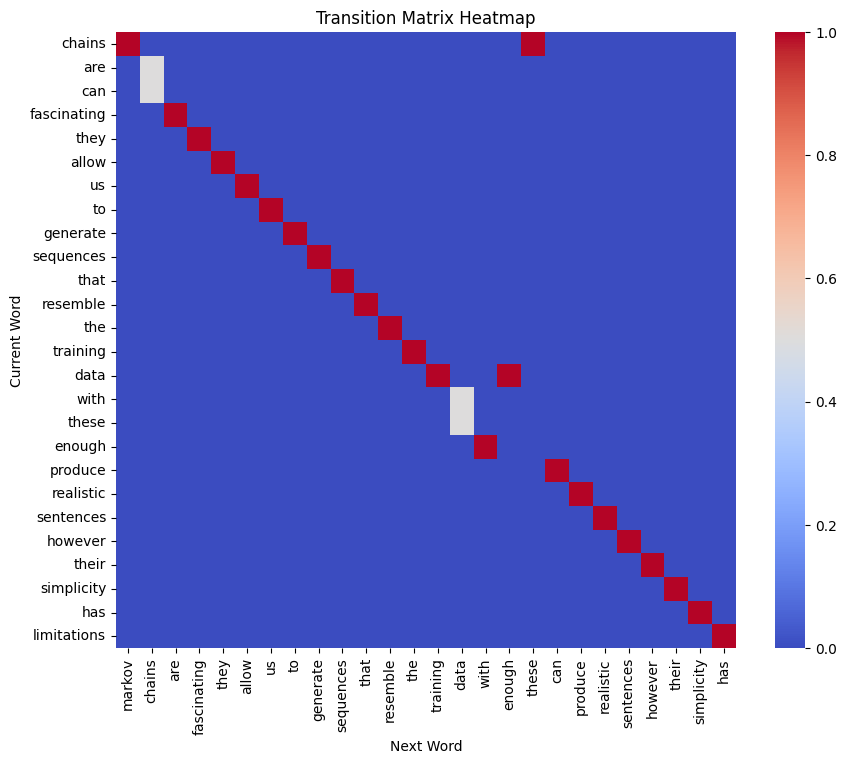

In [9]:
matrix_for_visualization = {
    key: {k: v for k, v in value.items()} for key, value in transition_matrix.items()
}
visualize_transition_matrix(matrix_for_visualization)

Experimentation with Higher-Order Markov Chains

In [10]:
def build_higher_order_matrix(tokens, order=2):
    """
    Builds a higher-order Markov Chain transition matrix.
    - order: The order of the Markov Chain (e.g., bigram, trigram).
    """
    matrix = defaultdict(lambda: defaultdict(int))
    for i in range(len(tokens) - order):
        current_state = tuple(tokens[i:i + order])
        next_word = tokens[i + order]
        matrix[current_state][next_word] += 1

    for current_state, transitions in matrix.items():
        total = sum(transitions.values())
        matrix[current_state] = {word: count / total for word, count in transitions.items()}
    return matrix

higher_order_matrix = build_higher_order_matrix(tokens, order=2)
print("Higher-Order Transition Matrix (Sample):", dict(list(higher_order_matrix.items())[:5]))

Higher-Order Transition Matrix (Sample): {('markov', 'chains'): {'are': 1.0}, ('chains', 'are'): {'fascinating': 1.0}, ('are', 'fascinating'): {'they': 1.0}, ('fascinating', 'they'): {'allow': 1.0}, ('they', 'allow'): {'us': 1.0}}


In [11]:
def generate_text_higher_order(start_state, transition_matrix, length=20):
    """
    Generates text using a higher-order Markov Chain transition matrix.
    - start_state: Starting tuple for the generation.
    - transition_matrix: The transition matrix.
    - length: Number of words to generate.
    """
    current_state = start_state
    generated_text = list(current_state)
    for _ in range(length - len(current_state)):
        if current_state not in transition_matrix:
            break
        next_word = random.choices(
            list(transition_matrix[current_state].keys()), 
            weights=transition_matrix[current_state].values()
        )[0]
        generated_text.append(next_word)
        current_state = tuple(generated_text[-len(current_state):])
    return ' '.join(generated_text)

start_state = ("markov", "chains")
generated_higher_order_text = generate_text_higher_order(start_state, higher_order_matrix)
print("\nGenerated Higher-Order Text:", generated_higher_order_text)


Generated Higher-Order Text: markov chains are fascinating they allow us to generate sequences that resemble the training data with enough data these chains
